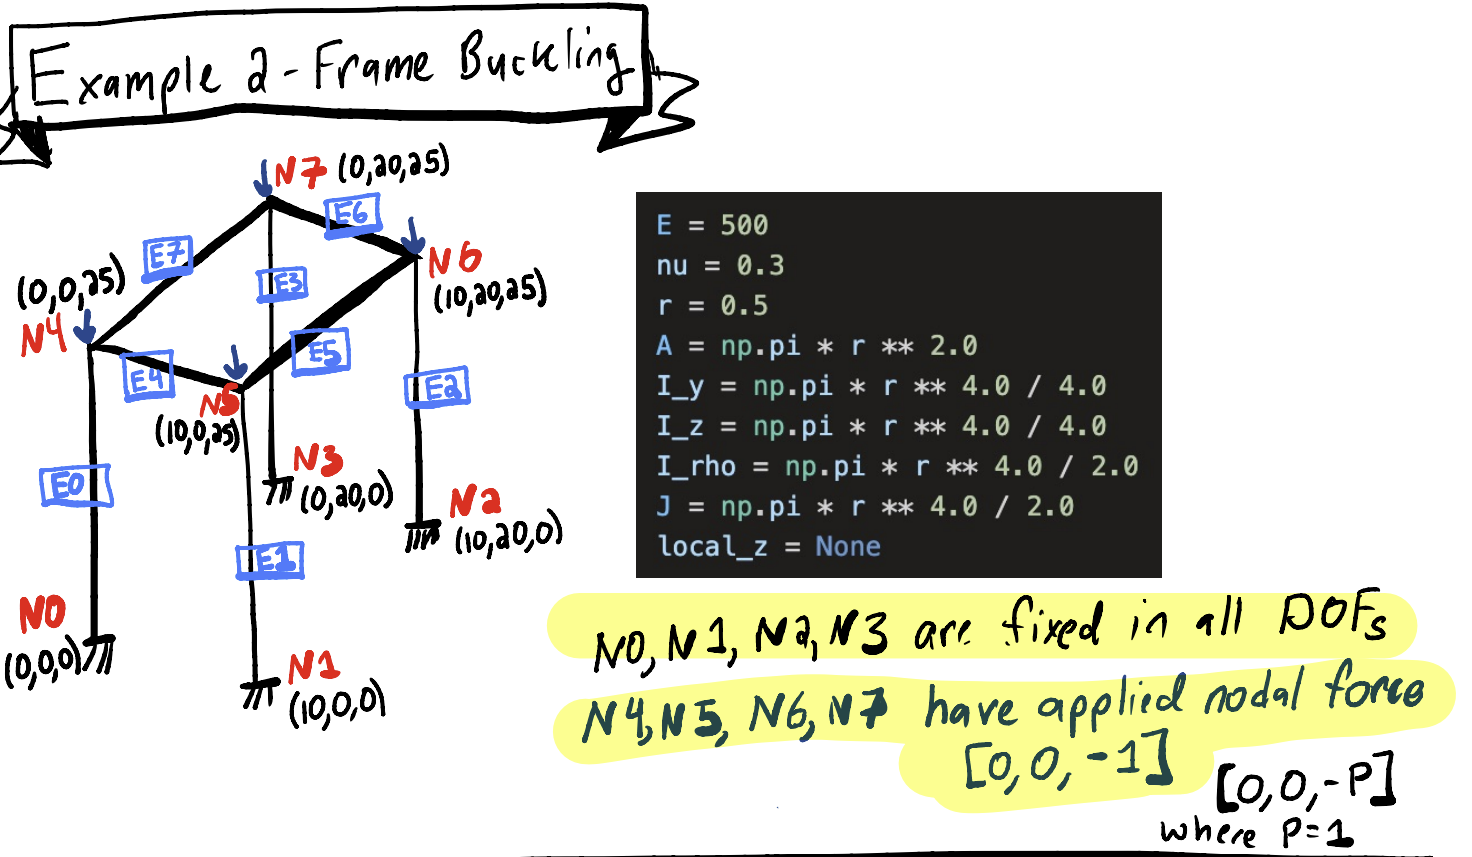
Image and example problem taken from Professor Emma Lejeune's examples from ME700 S25 Boston University

In [ ]:
from Scripts import direct_stiffness as ds
import math as mt
import numpy as np
import scipy as sc


#enter x, y , z coordinates as a row for each node
#the first row will be considered node 1 and so on
node_cordinates = np.matrix([[0,0,0],
                            [10,0,0],
                            [10,20,0],
                            [0,20,0],
                            [0,0,25],
                            [10,0,25],
                            [10,20,25],
                            [0,20,25]])

#enter nodal forces/torques for each node as a row (Fx, Fy, Fx, Mx, My, Mz)
#the first row will be considered node 1 and so on
node_force = np.matrix([[0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,-1,0,0,0],
                       [0,0,-1,0,0,0],
                       [0,0,-1,0,0,0],
                       [0,0,-1,0,0,0]])

#enter nodal degrees of freedom for each node as a row (x,y,z,rot_x,rot_y,rot_z)
#0 for constrained and 1 for free
#the first row will be considered node 1 and so on
node_DOF = np.matrix([[0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [1,1,1,1,1,1],
                     [1,1,1,1,1,1],
                     [1,1,1,1,1,1],
                     [1,1,1,1,1,1]])

member_localz = np.array([0,0,0,0,0,0,0,0], dtype=object)


#enter member properties and connecting nodes E, nu, A, Iy, Iz, J, 1, 2
#the first row will be considered member A, the second row will be member B and so on
r = .5
E = 500
nu = .3
A = np.pi*r**2
Iy = (np.pi*r**4)/4
Iz = (np.pi*r**4)/4
Irho = (np.pi*r**4)/2
J = (np.pi*r**4)/2





members = np.matrix([[E, nu, A, Iy, Iz, Irho, J, 1, 5],    #member E0
                     [E, nu, A, Iy, Iz, Irho, J, 2, 6],    #member E1
                     [E, nu, A, Iy, Iz, Irho, J, 3, 7],    #member E2
                     [E, nu, A, Iy, Iz, Irho, J, 4, 8],    #member E3
                     [E, nu, A, Iy, Iz, Irho, J, 5, 6],     #member E4
                     [E, nu, A, Iy, Iz, Irho, J, 6, 7],     #member E5
                     [E, nu, A, Iy, Iz, Irho, J, 7, 8],     #member E6
                     [E, nu, A, Iy, Iz, Irho, J, 8, 5]])     #member E7



F_global = np.zeros((len(node_DOF)*6, 1))  # 24x1 zero matrix    
DOF_global = np.zeros((len(node_DOF)*6, 1))  # 24x1 zero matrix

for i in range(len(node_force)):  
    F_global[i*6:i*6+6, 0] = node_force[i].flatten()

for i in range(len(node_DOF)):  
    DOF_global[i*6:i*6+6, 0] = node_DOF[i].flatten()



K_global = ds.global_stiffness_mat(members,node_cordinates, member_localz)

displacements, reaction_forces, K_reduced = ds.solve_for_displacements_and_reactions(K_global, F_global, node_DOF)

internal_forces = np.array(ds.compute_internal_forces(members, node_cordinates, member_localz, displacements))

Kg_global =   ds.global_3D_stiffness_mat(members,node_cordinates, member_localz, internal_forces)

Kg_reduced = ds.solve_for_Kg_global_ff(Kg_global, F_global, node_DOF)

eigenvalues, eigenvectors = ds.solve_gen_eig(K_global,Kg_global)


DOF_describe = [["Fx"],["Fy"],["Fz"],["Mx"],["My"],["Mz"]]
Full_DOF_describe = np.vstack([DOF_describe] * len(node_DOF))




print("Displacement of Nodes (x, y, z, rotation_x, rotation_y, rotation_z")
for i in range(len(node_DOF)):
    print("Node", i)
    print(displacements[i*6:i*6+6])

print("Reaction forces (at constrained DOFs):")
for i in range(len(DOF_global)):
    if DOF_global[i] == 0:
        node = mt.floor(i/6)
        print("Node", node, Full_DOF_describe[i], reaction_forces[i])
        

#print(eigenvalues)
print("Critical Force")
print(min(eigenvalues))